# **We randomly selected 60000 from previous_application.csv**

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [2]:
# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [4]:
#pip install --upgrade scikit-learn

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Read the dataset - previous_application.csv**

In [6]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data1=pd.read_csv('/content/drive/MyDrive/previous_application.csv')

In [8]:
# copying data to another varaible to avoid any changes to original data
previous_app = data1.copy()


In [9]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
previous_app.shape

(1670214, 37)

In [11]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(previous_app.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [12]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# CODE_REJECT_REASON -    Why was the previous application rejected
previous_app['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

In [14]:
# NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application
previous_app['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [15]:
data=previous_app

## **MISSING VALUE TREATMENT**

In [16]:
def missing_values_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100*df.isnull().sum() / len(df)

    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)

    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')

    return mis_val_table_ren_columns

In [17]:
# missing values check
missing_values = missing_values_table(previous_app)
missing_values.head(20)

Your selected dataframe has37columns.
There are16columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,1664263,99.6
RATE_INTEREST_PRIMARY,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_LAST_DUE,673065,40.3
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3


In [18]:
# Number of each type of column
previous_app.dtypes.value_counts()

object     16
float64    15
int64       6
Name: count, dtype: int64

In [19]:
previous_app.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [20]:
previous_app['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

# Encoding Categorical Variables

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436

In [21]:
# Label Encode categorical variables
Status = {"Approved": 0, "Canceled": 1,"Refused": 1,"Unused offer": 1}
previous_app["NAME_CONTRACT_STATUS"] = previous_app["NAME_CONTRACT_STATUS"].map(Status)

In [22]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,0,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,0,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,1,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in previous_app:
    if previous_app[col].dtype == 'object':

        if len(list(previous_app[col].unique())) <= 2:
            le.fit(previous_app[col])
        # Transform both training and testing data
            previous_app[col] = le.transform(previous_app[col])


            le_count +=1

print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [24]:
previous_app = pd.get_dummies(previous_app)


print('Training Feature shape: ', previous_app.shape)



Training Feature shape:  (1670214, 160)


In [25]:
train_labels =previous_app['NAME_CONTRACT_STATUS']



previous_app['NAME_CONTRACT_STATUS'] =train_labels

print('Training Feature shape: ', previous_app.shape)


Training Feature shape:  (1670214, 160)


In [26]:
correlations = previous_app.corr()['NAME_CONTRACT_STATUS'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 NAME_CLIENT_TYPE_XNA                                   0.022704
CHANNEL_TYPE_Channel of corporate sales                0.023808
WEEKDAY_APPR_PROCESS_START_TUESDAY                     0.024323
CODE_REJECT_REASON_SYSTEM                              0.026513
WEEKDAY_APPR_PROCESS_START_MONDAY                      0.026843
NAME_CASH_LOAN_PURPOSE_Buying a used car               0.027079
CHANNEL_TYPE_AP+ (Cash loan)                           0.028400
NAME_CASH_LOAN_PURPOSE_Urgent needs                    0.028723
NAME_CASH_LOAN_PURPOSE_Building a house or an annex    0.030653
NAME_CASH_LOAN_PURPOSE_Payments on other loans         0.032487
PRODUCT_COMBINATION_Cash Street: middle                0.033872
NAME_CASH_LOAN_PURPOSE_Other                           0.038624
SK_ID_PREV                                             0.046699
CODE_REJECT_REASON_VERIF                               0.058920
NAME_CASH_LOAN_PURPOSE_Repairs                         0.063297
CODE_REJECT

# From reviewing the correlations above we selected the independent variables below

In [27]:
loan=previous_app[['SK_ID_CURR','CODE_REJECT_REASON_XAP','PRODUCT_COMBINATION_Cash','NAME_CONTRACT_TYPE_Consumer loans','CODE_REJECT_REASON_HC','CODE_REJECT_REASON_SYSTEM','NAME_PORTFOLIO_POS','NAME_PORTFOLIO_XNA','NAME_CONTRACT_STATUS']]

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  bool 
 2   PRODUCT_COMBINATION_Cash           1670214 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  bool 
 4   CODE_REJECT_REASON_HC              1670214 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  bool 
 6   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  bool 
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 36.6 MB


In [29]:
loan["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
0    1036781
1     633433
Name: count, dtype: int64

In [30]:
loan.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,PRODUCT_COMBINATION_Cash,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
0,271877,True,False,True,False,False,True,False,0
1,108129,True,False,False,False,False,False,False,0
2,122040,True,False,False,False,False,False,False,0
3,176158,True,False,False,False,False,False,False,0
4,202054,False,False,False,True,False,False,False,1


# **Heatmap of Selected Variables from above**

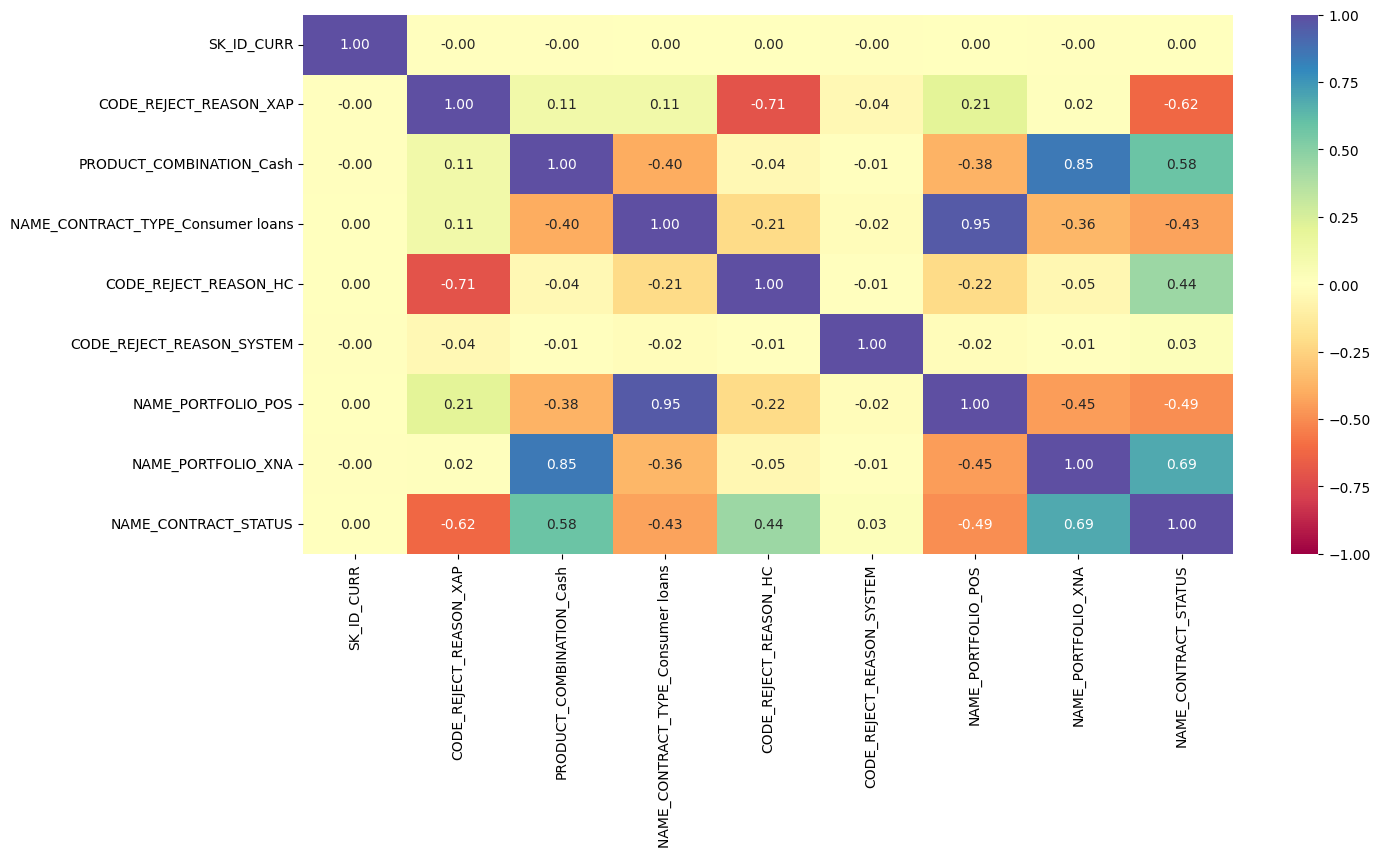

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Check for missing values on Selected Variables/Columns

In [32]:
loan.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
PRODUCT_COMBINATION_Cash             0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# FINAL SEVEN

From above the Final 7 Variables to be focused on will be:

These 7 were selected because based on research of the domain, strong correlation to Independent Variable and minimal missing values which will require substantial imputation of values.

# Model Building Approach - Gaussian Naive Bayes Model

1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune/Oversample/Undersample the model if required.

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  bool 
 2   PRODUCT_COMBINATION_Cash           1670214 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  bool 
 4   CODE_REJECT_REASON_HC              1670214 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  bool 
 6   NAME_PORTFOLIO_POS                 1670214 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  bool 
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 36.6 MB


In [34]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

338857

# Check for duplicates on SK_ID_CURR

In [35]:
df_train_no_duplicates2 = loan.drop_duplicates(subset=['SK_ID_CURR'])

In [36]:
df_train_no_duplicates2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338857 entries, 0 to 1670060
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   SK_ID_CURR                         338857 non-null  int64
 1   CODE_REJECT_REASON_XAP             338857 non-null  bool 
 2   PRODUCT_COMBINATION_Cash           338857 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  338857 non-null  bool 
 4   CODE_REJECT_REASON_HC              338857 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          338857 non-null  bool 
 6   NAME_PORTFOLIO_POS                 338857 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 338857 non-null  bool 
 8   NAME_CONTRACT_STATUS               338857 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 10.0 MB


In [37]:
df_train_no_duplicates2.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
PRODUCT_COMBINATION_Cash             0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# **TAKE A RANDOM SAMPLE OF 60,000 - From the previous_application.csv dataset which has been processed so far**

In [38]:
loan_random_sel=df_train_no_duplicates2.sample(n=60000, random_state=1)

In [39]:
loan_random_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 737318 to 706651
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   SK_ID_CURR                         60000 non-null  int64
 1   CODE_REJECT_REASON_XAP             60000 non-null  bool 
 2   PRODUCT_COMBINATION_Cash           60000 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  60000 non-null  bool 
 4   CODE_REJECT_REASON_HC              60000 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          60000 non-null  bool 
 6   NAME_PORTFOLIO_POS                 60000 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 60000 non-null  bool 
 8   NAME_CONTRACT_STATUS               60000 non-null  int64
dtypes: bool(7), int64(2)
memory usage: 1.8 MB


Split Data

In [40]:
# separating the independent and dependent variables

X = loan_random_sel.drop(["NAME_CONTRACT_STATUS"], axis=1)
y = loan_random_sel["NAME_CONTRACT_STATUS"]

In [41]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,PRODUCT_COMBINATION_Cash,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
737318,248439,True,False,True,False,False,True,False
382029,455947,True,False,False,False,False,False,False
65164,130748,True,False,False,False,False,False,False
103459,411314,True,False,True,False,False,True,False
1424460,251033,True,False,True,False,False,True,False


# Splitting the data into X and y

In [42]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(30000, 8) (18000, 8) (12000, 8)


In [43]:
X_train.head()



,SK_ID_CURR,CODE_REJECT_REASON_XAP,PRODUCT_COMBINATION_Cash,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
464830,403976,True,False,True,False,False,True,False
118300,203663,True,False,True,False,False,True,False
1305482,206109,True,False,True,False,False,True,False
134432,369853,True,False,True,False,False,True,False
491112,393481,True,False,True,False,False,True,False


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 464830 to 331131
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   SK_ID_CURR                         30000 non-null  int64
 1   CODE_REJECT_REASON_XAP             30000 non-null  bool 
 2   PRODUCT_COMBINATION_Cash           30000 non-null  bool 
 3   NAME_CONTRACT_TYPE_Consumer loans  30000 non-null  bool 
 4   CODE_REJECT_REASON_HC              30000 non-null  bool 
 5   CODE_REJECT_REASON_SYSTEM          30000 non-null  bool 
 6   NAME_PORTFOLIO_POS                 30000 non-null  bool 
 7   NAME_PORTFOLIO_XNA                 30000 non-null  bool 
dtypes: bool(7), int64(1)
memory usage: 673.8 KB


In [45]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
NAME_CONTRACT_STATUS
0    0.750733
1    0.249267
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
NAME_CONTRACT_STATUS
0    0.750733
1    0.249267
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
NAME_CONTRACT_STATUS
0    0.750722
1    0.249278
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
NAME_CONTRACT_STATUS
0    0.75075
1    0.24925
Name: proportion, dtype: float64
********************************************************************************


In [46]:
X_train.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,PRODUCT_COMBINATION_Cash,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
464830,403976,True,False,True,False,False,True,False
118300,203663,True,False,True,False,False,True,False
1305482,206109,True,False,True,False,False,True,False
134432,369853,True,False,True,False,False,True,False
491112,393481,True,False,True,False,False,True,False


# **Build a Gaussian Naive Bayes Model**

In [47]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [48]:
# Predict class labels for X_train
y_pred = gnb.predict(X_train)

In [49]:
# Predict class probabilities for X_train
y_pred_prob = gnb.predict_proba(X_train)



In [50]:
# Create a dataframe with predicted class labels and probabilities
result_df = pd.DataFrame(y_pred_prob, columns=gnb.classes_)
result_df['target'] = y_pred


In [51]:

# Print the resulting dataframe
print(result_df)


              0         1  target
0      0.772303  0.227697       0
1      0.776576  0.223424       0
2      0.776503  0.223497       0
3      0.772783  0.227217       0
4      0.772440  0.227560       0
...         ...       ...     ...
29995  0.736652  0.263348       0
29996  0.761273  0.238727       0
29997  0.772687  0.227313       0
29998  0.735452  0.264548       0
29999  0.772294  0.227706       0

[30000 rows x 3 columns]


In [52]:
# Predict class labels and probabilities for training data
y_pred = gnb.predict(X_train)
y_probs = gnb.predict_proba(X_train)

# Create a dataframe with original X_train column names and "target" column
result_df = pd.DataFrame(X_train, columns=X_train.columns)
result_df['target'] = y_pred

# Add columns for class probabilities
for i, class_name in enumerate(gnb.classes_):
    result_df[f'prob_{class_name}'] = y_probs[:, i]

# Display the resulting dataframe
print(result_df)


         SK_ID_CURR  CODE_REJECT_REASON_XAP  PRODUCT_COMBINATION_Cash  \
464830       403976                    True                     False   
118300       203663                    True                     False   
1305482      206109                    True                     False   
134432       369853                    True                     False   
491112       393481                    True                     False   
...             ...                     ...                       ...   
76341        309683                    True                      True   
45661        117033                    True                     False   
135761       376161                    True                     False   
941283       368976                    True                      True   
331131       404702                    True                     False   

         NAME_CONTRACT_TYPE_Consumer loans  CODE_REJECT_REASON_HC  \
464830                                True            

In [53]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 464830 to 331131
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         30000 non-null  int64  
 1   CODE_REJECT_REASON_XAP             30000 non-null  bool   
 2   PRODUCT_COMBINATION_Cash           30000 non-null  bool   
 3   NAME_CONTRACT_TYPE_Consumer loans  30000 non-null  bool   
 4   CODE_REJECT_REASON_HC              30000 non-null  bool   
 5   CODE_REJECT_REASON_SYSTEM          30000 non-null  bool   
 6   NAME_PORTFOLIO_POS                 30000 non-null  bool   
 7   NAME_PORTFOLIO_XNA                 30000 non-null  bool   
 8   target                             30000 non-null  int64  
 9   prob_0                             30000 non-null  float64
 10  prob_1                             30000 non-null  float64
dtypes: bool(7), float64(2), int64(2)
memory usage: 1.3 MB

In [54]:
result_df1=result_df[['SK_ID_CURR','target','prob_0','prob_1']].copy()

In [55]:
result_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 464830 to 331131
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  30000 non-null  int64  
 1   target      30000 non-null  int64  
 2   prob_0      30000 non-null  float64
 3   prob_1      30000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.1 MB


In [56]:
#Check df1
result_df1['target'].value_counts()

target
0    30000
Name: count, dtype: int64

# BRING in application_train csv - We bring in the application_train dataset and merge with the dataset created using the Gausian Naive Bayes Model

In [57]:
data2=pd.read_csv('/content/drive/MyDrive/application_train.csv')

In [58]:
app_train1 = data2.copy()

In [59]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## **MERGE the application_train dataset with the dataset created using the Gausian Naive Bayes Model**

In [60]:
app_train_merge=pd.merge(result_df1, app_train1, on = "SK_ID_CURR", how = "left")

In [61]:
app_train_merge.shape

(30000, 125)

In [62]:
app_train_merge.head()

,SK_ID_CURR,target,prob_0,prob_1,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,403976,0,0.772303,0.227697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203663,0,0.776576,0.223424,0.0,Cash loans,F,Y,Y,1.0,135000.0,381528.0,18553.5,315000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-16166.0,-3049.0,-2973.0,-4578.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,3.0,3.0,2.0,WEDNESDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.225537,0.298556,0.454321,0.5814,0.5086,0.9955,0.932,0.2014,0.56,0.4483,0.6250,0.0417,0.1648,0.4598,0.7640,0.0656,0.2787,0.5924,0.5278,0.9955,0.9347,0.2033,0.5639,0.4483,0.6250,0.0417,0.1686,0.5023,0.7960,0.0661,0.2950,0.5871,0.5086,0.9955,0.9329,0.2027,0.56,0.4483,0.6250,0.0417,0.1677,0.4677,0.7777,0.0660,0.2845,reg oper account,block of flats,0.7716,Monolithic,No,0.0,0.0,0.0,0.0,-391.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,206109,0,0.776503,0.223497,0.0,Cash loans,M,N,N,1.0,112500.0,801963.0,30676.5,648000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.031329,-17766.0,-7500.0,-1603.0,-1304.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,3.0,2.0,2.0,THURSDAY,8.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.819197,0.456861,0.510090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [63]:
app_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 28.6+ MB


In [64]:
loan_random_sel.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,PRODUCT_COMBINATION_Cash,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
737318,248439,True,False,True,False,False,True,False,0
382029,455947,True,False,False,False,False,False,False,0
65164,130748,True,False,False,False,False,False,False,0
103459,411314,True,False,True,False,False,True,False,0
1424460,251033,True,False,True,False,False,True,False,0


In [65]:
result_df1.head()

,SK_ID_CURR,target,prob_0,prob_1
464830,403976,0,0.772303,0.227697
118300,203663,0,0.776576,0.223424
1305482,206109,0,0.776503,0.223497
134432,369853,0,0.772783,0.227217
491112,393481,0,0.772440,0.227560


In [66]:
loan_random_sel.shape

(60000, 9)

In [67]:
result_df1.shape

(30000, 4)

In [68]:
app_train_merge.shape

(30000, 125)

In [69]:
app_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 28.6+ MB


# **Create a copy of app_train_merge and name it loanmodel**

In [70]:
loanmodel=app_train_merge.copy()

In [71]:
loanmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 125 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(2), object(16)
memory usage: 28.6+ MB


# **KEEP THE COLUMNS FROM GAUSIAN MODEL AND COLUMNS USED IN PREVIOUS RANDOM FOREST MODEL**

In [72]:
loanmodel.head()

,SK_ID_CURR,target,prob_0,prob_1,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,403976,0,0.772303,0.227697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203663,0,0.776576,0.223424,0.0,Cash loans,F,Y,Y,1.0,135000.0,381528.0,18553.5,315000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-16166.0,-3049.0,-2973.0,-4578.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,3.0,3.0,2.0,WEDNESDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.225537,0.298556,0.454321,0.5814,0.5086,0.9955,0.932,0.2014,0.56,0.4483,0.6250,0.0417,0.1648,0.4598,0.7640,0.0656,0.2787,0.5924,0.5278,0.9955,0.9347,0.2033,0.5639,0.4483,0.6250,0.0417,0.1686,0.5023,0.7960,0.0661,0.2950,0.5871,0.5086,0.9955,0.9329,0.2027,0.56,0.4483,0.6250,0.0417,0.1677,0.4677,0.7777,0.0660,0.2845,reg oper account,block of flats,0.7716,Monolithic,No,0.0,0.0,0.0,0.0,-391.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,206109,0,0.776503,0.223497,0.0,Cash loans,M,N,N,1.0,112500.0,801963.0,30676.5,648000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.031329,-17766.0,-7500.0,-1603.0,-1304.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,3.0,2.0,2.0,THURSDAY,8.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.819197,0.456861,0.510090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [73]:
loanmodel['TARGET'].value_counts()

TARGET
0.0    23689
1.0     2151
Name: count, dtype: int64

# SPLITTING

Before modelling we drop the SK_ID_CURR

In [74]:
loanmodel=loanmodel.drop(["SK_ID_CURR"], axis=1)

loanmodel.head(20)

In [75]:
loanmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 124 entries, target to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(107), int64(1), object(16)
memory usage: 28.4+ MB


In [76]:
nan_columns = loanmodel.isna().any()
columns_with_nan = nan_columns[nan_columns].index.tolist()
print(columns_with_nan)


['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', '

# **Columns that contain NaNs**

In [77]:
# Counting the NaNs in each column
nans_per_column = loanmodel.isna().sum()

# Filtering out the columns with more than 0 NaNs
columns_with_nans = nans_per_column[nans_per_column > 0]

print(columns_with_nans)


TARGET                           4160
NAME_CONTRACT_TYPE               4160
CODE_GENDER                      4160
FLAG_OWN_CAR                     4160
FLAG_OWN_REALTY                  4160
CNT_CHILDREN                     4160
AMT_INCOME_TOTAL                 4160
AMT_CREDIT                       4160
AMT_ANNUITY                      4162
AMT_GOODS_PRICE                  4187
NAME_TYPE_SUITE                  4241
NAME_INCOME_TYPE                 4160
NAME_EDUCATION_TYPE              4160
NAME_FAMILY_STATUS               4160
NAME_HOUSING_TYPE                4160
REGION_POPULATION_RELATIVE       4160
DAYS_BIRTH                       4160
DAYS_EMPLOYED                    4160
DAYS_REGISTRATION                4160
DAYS_ID_PUBLISH                  4160
OWN_CAR_AGE                     21163
FLAG_MOBIL                       4160
FLAG_EMP_PHONE                   4160
FLAG_WORK_PHONE                  4160
FLAG_CONT_MOBILE                 4160
FLAG_PHONE                       4160
FLAG_EMAIL  

# **Columns that do not contain Nans**

In [78]:
# Counting the NaNs in each column
nans_per_column = loanmodel.isna().sum()

# Filtering out the columns with 0 NaNs, meaning no missing values
columns_without_nans = nans_per_column[nans_per_column == 0].index.tolist()

print(columns_without_nans)


['target', 'prob_0', 'prob_1']


# **We will use columns used in previous Random Forest Model and add the columns from Gausian Model**

In [79]:
loanmodel2=loanmodel[['TARGET','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL','target','prob_0','prob_1']]

In [80]:
loanmodel2.head()

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,AMT_CREDIT,AMT_INCOME_TOTAL,target,prob_0,prob_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.772303,0.227697
1,0.0,0.298556,0.454321,-16166.0,-4578.0,-2973.0,18553.5,-391.0,-3049.0,381528.0,135000.0,0,0.776576,0.223424
2,0.0,0.456861,0.510090,-17766.0,-1304.0,-1603.0,30676.5,-567.0,-7500.0,801963.0,112500.0,0,0.776503,0.223497
3,0.0,0.598690,0.313917,-11061.0,-3130.0,-420.0,33192.0,-1756.0,-4037.0,780363.0,157500.0,0,0.772783,0.227217
4,0.0,0.640272,0.313917,-20025.0,-3532.0,-1176.0,13351.5,-1058.0,-2652.0,135000.0,153000.0,0,0.772440,0.227560


In [81]:
loanmodel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  25840 non-null  float64
 1   EXT_SOURCE_2            25779 non-null  float64
 2   EXT_SOURCE_3            20827 non-null  float64
 3   DAYS_BIRTH              25840 non-null  float64
 4   DAYS_ID_PUBLISH         25840 non-null  float64
 5   DAYS_REGISTRATION       25840 non-null  float64
 6   AMT_ANNUITY             25838 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE  25840 non-null  float64
 8   DAYS_EMPLOYED           25840 non-null  float64
 9   AMT_CREDIT              25840 non-null  float64
 10  AMT_INCOME_TOTAL        25840 non-null  float64
 11  target                  30000 non-null  int64  
 12  prob_0                  30000 non-null  float64
 13  prob_1                  30000 non-null  float64
dtypes: float64(13), int64(1)
memory usage:

In [82]:
# Step 1 & 2: Check for NaNs and sum them up per column
missing_values_count = loanmodel2.isna().sum()

# Step 3: Display the number of missing values per column
print(missing_values_count)


TARGET                    4160
EXT_SOURCE_2              4221
EXT_SOURCE_3              9173
DAYS_BIRTH                4160
DAYS_ID_PUBLISH           4160
DAYS_REGISTRATION         4160
AMT_ANNUITY               4162
DAYS_LAST_PHONE_CHANGE    4160
DAYS_EMPLOYED             4160
AMT_CREDIT                4160
AMT_INCOME_TOTAL          4160
target                       0
prob_0                       0
prob_1                       0
dtype: int64


## **Drop rows that contain NaN values**

In [83]:
loanmodel2 = loanmodel2.dropna()


In [84]:
loanmodel2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20780 entries, 1 to 29999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  20780 non-null  float64
 1   EXT_SOURCE_2            20780 non-null  float64
 2   EXT_SOURCE_3            20780 non-null  float64
 3   DAYS_BIRTH              20780 non-null  float64
 4   DAYS_ID_PUBLISH         20780 non-null  float64
 5   DAYS_REGISTRATION       20780 non-null  float64
 6   AMT_ANNUITY             20780 non-null  float64
 7   DAYS_LAST_PHONE_CHANGE  20780 non-null  float64
 8   DAYS_EMPLOYED           20780 non-null  float64
 9   AMT_CREDIT              20780 non-null  float64
 10  AMT_INCOME_TOTAL        20780 non-null  float64
 11  target                  20780 non-null  int64  
 12  prob_0                  20780 non-null  float64
 13  prob_1                  20780 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 2.4 

In [85]:
# separating the independent and dependent variables

X = loanmodel2.drop(["TARGET"], axis=1)
y = loanmodel2["TARGET"]

In [86]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,AMT_CREDIT,AMT_INCOME_TOTAL,target,prob_0,prob_1
1,0.298556,0.454321,-16166.0,-4578.0,-2973.0,18553.5,-391.0,-3049.0,381528.0,135000.0,0,0.776576,0.223424
2,0.456861,0.510090,-17766.0,-1304.0,-1603.0,30676.5,-567.0,-7500.0,801963.0,112500.0,0,0.776503,0.223497
3,0.598690,0.313917,-11061.0,-3130.0,-420.0,33192.0,-1756.0,-4037.0,780363.0,157500.0,0,0.772783,0.227217
4,0.640272,0.313917,-20025.0,-3532.0,-1176.0,13351.5,-1058.0,-2652.0,135000.0,153000.0,0,0.772440,0.227560
5,0.690557,0.574447,-18132.0,-1646.0,-2285.0,31041.0,0.0,-3634.0,1061599.5,225000.0,0,0.775301,0.224699


In [87]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(10390, 13) (6234, 13) (4156, 13)


In [88]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
TARGET
0.0    0.9205
1.0    0.0795
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
TARGET
0.0    0.9205
1.0    0.0795
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
TARGET
0.0    0.920436
1.0    0.079564
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
TARGET
0.0    0.920597
1.0    0.079403
Name: proportion, dtype: float64
********************************************************************************


## **RANDOM FOREST**

Let's first build a model with default parameters and see it's performance

In [89]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

# **Let's check model's performance**

In [90]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

print("")

# F1 score on train and validation set
print("F1 Score on train and validation set")
print(f1_score(y_train, rf.predict(X_train)))
print(f1_score(y_val, rf.predict(X_val)))
print("")

Recall on train and validation set
0.9987893462469734
0.004032258064516129

Precision on train and validation set
1.0
0.3333333333333333

Accuracy on train and validation set
0.9999037536092397
0.9201154956689124

F1 Score on train and validation set
0.9993943064809208
0.00796812749003984



In [91]:
# Checking F1 score on train and validation set
print("F1 Score on train and validation set")
print(f1_score(y_train, rf.predict(X_train)))
print(f1_score(y_val, rf.predict(X_val)))
print("")


F1 Score on train and validation set
0.9993943064809208
0.00796812749003984



# **Hyperparameter Tuning**

Grid Search CV

Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on the specific parameter values of a model. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# **Hyperparameters available for an algorithm?**

In [92]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We can choose which ones to tune.

In [93]:
print(np.arange(0.2, 0.7, 0.1))

print(np.arange(5,10))

[0.2 0.3 0.4 0.5 0.6]
[5 6 7 8 9]


# **Let's tune Random forest using Grid Search**

In [94]:
%%time

# Choose the type of classifier.
rf1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
CPU times: user 45.2 s, sys: 8.99 s, total: 54.2 s
Wall time: 4min 18s


{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 0.30000000000000004,
 'max_samples': 0.6000000000000001,
 'min_impurity_decrease': 0.003,
 'min_samples_leaf': 5,
 'n_estimators': 200}

Let's check the best CV score, for the obtained parameters

In [95]:
grid_obj.best_score_

0.5920481927710843

Let's build a model with obtained best parameter

We are hard coding the hyperparameters separately so that we don't have to run the grid search again.

In [96]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.6000000000000001,
    min_samples_leaf=5,
    n_estimators=150,
    max_depth=3,
    random_state=1,
    min_impurity_decrease=0.001,
)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

Let's check the model's performance

In [97]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf1_tuned.predict(X_train)))
print(recall_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf1_tuned.predict(X_train)))
print(precision_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf1_tuned.predict(X_train)))
print(accuracy_score(y_val, rf1_tuned.predict(X_val)))

print("")

# Checking F1 score on train and validation set
print("F1 Score on train and validation set")
print(f1_score(y_train, rf1_tuned.predict(X_train)))
print(f1_score(y_val, rf1_tuned.predict(X_val)))
print("")

Recall on train and validation set
0.6162227602905569
0.6108870967741935

Precision on train and validation set
0.17172739541160595
0.17196367763904655

Accuracy on train and validation set
0.7332050048123195
0.7350016041065127

F1 Score on train and validation set
0.26860158311345644
0.2683790965456156



# **Randomized Search CV**

Random search is a tuning technique that attempts to compute the optimum values of hyperparameters randomly unlike grid search

# **Let's tune Random forest using Randomized Search**

In [98]:
%%time

# Choose the type of classifier.
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 1.77 s, sys: 110 ms, total: 1.88 s
Wall time: 5.65 s


{'n_estimators': 150,
 'min_samples_leaf': 9,
 'min_impurity_decrease': 0.003,
 'max_samples': 0.6000000000000001,
 'max_features': 0.4000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced'}

Let's check the best CV score, for the obtained parameters

In [99]:
grid_obj.best_score_

0.5835779481562615

In [100]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
    max_depth=3,
    min_impurity_decrease=0.003,
)

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.5, min_impurity_decrease=0.003,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

Let's check the model's performance

In [101]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf2_tuned.predict(X_train)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, rf2_tuned.predict(X_train)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, rf2_tuned.predict(X_train)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

print("")
print("F1 Score on train and validation set")
# Checking accuracy score on train and validation set
print(f1_score(y_train, rf2_tuned.predict(X_train)))
print(f1_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.6089588377723971
0.6068548387096774

Precision on train and validation set
0.17021996615905247
0.17034521788341822

Accuracy on train and validation set
0.7329162656400385
0.7335579082451075

F1 Score on train and validation set
0.2660671779952394
0.26601855943437913


# **Choose a best model and predict the performance on the test set¶**

In [102]:
model1 = rf1_tuned

In [103]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model1.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model1.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model1.predict(X_test)))
print("")

# Checking accuracy score on test set
print("F1 Score on test set")
print(f1_score(y_test, model1.predict(X_test)))

Recall on test set
0.6424242424242425

Precision on test set
0.1706924315619968

Accuracy on test set
0.7237728585178056

F1 Score on test set
0.2697201017811705


In [104]:
model2 = rf2_tuned

In [105]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model2.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model2.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model2.predict(X_test)))

print("")

# Checking accuracy score on test set
print("F1 Score on test set")
print(f1_score(y_test, model2.predict(X_test)))

Recall on test set
0.6484848484848484

Precision on test set
0.17271993543179984

Accuracy on test set
0.7254571703561117

F1 Score on test set
0.2727852135117909
